In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [92]:
#This reads the Super Covid dataset from the csv file
super_covid = pd.read_csv('super_covid_data-1.csv')

super_covid_df = pd.DataFrame(super_covid)

super_covid.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [93]:
# Selects the data for Vermont from the super_covid dataset
vermont_data = super_covid[super_covid['State_x'] == 'VT']

# Identify columns containing cases and deaths data for Vermont between July and December 2020
columns_cases = [col for col in vermont_data if col.endswith('x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in vermont_data if col.endswith('y') and '2020-07' <= col.split('_')[0] <= '2020-12']

# Define a function to calculate weekly data (mean, median, mode) for the given data and columns
def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

# Calculate weekly data for cases and deaths in Vermont
weekly_cases_stats = calculate_weekly_stats(vermont_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(vermont_data, columns_deaths)

# Print the weekly statistics for cases and deaths
print("Weekly Cases Stats:")
print(weekly_cases_stats.head()) 
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())


Weekly Cases Stats:
                  mean  median  mode
date                                
2020-07-05   87.628571    50.0    10
2020-07-12   90.336735    51.0    10
2020-07-19   94.193878    53.5     5
2020-07-26   97.918367    57.0    14
2020-08-02  100.255102    59.0    14

Weekly Deaths Stats:
                mean  median  mode
date                              
2020-07-05  4.000000     1.0     0
2020-07-12  4.000000     1.0     0
2020-07-19  4.000000     1.0     0
2020-07-26  4.000000     1.0     0
2020-08-02  4.030612     1.0     0


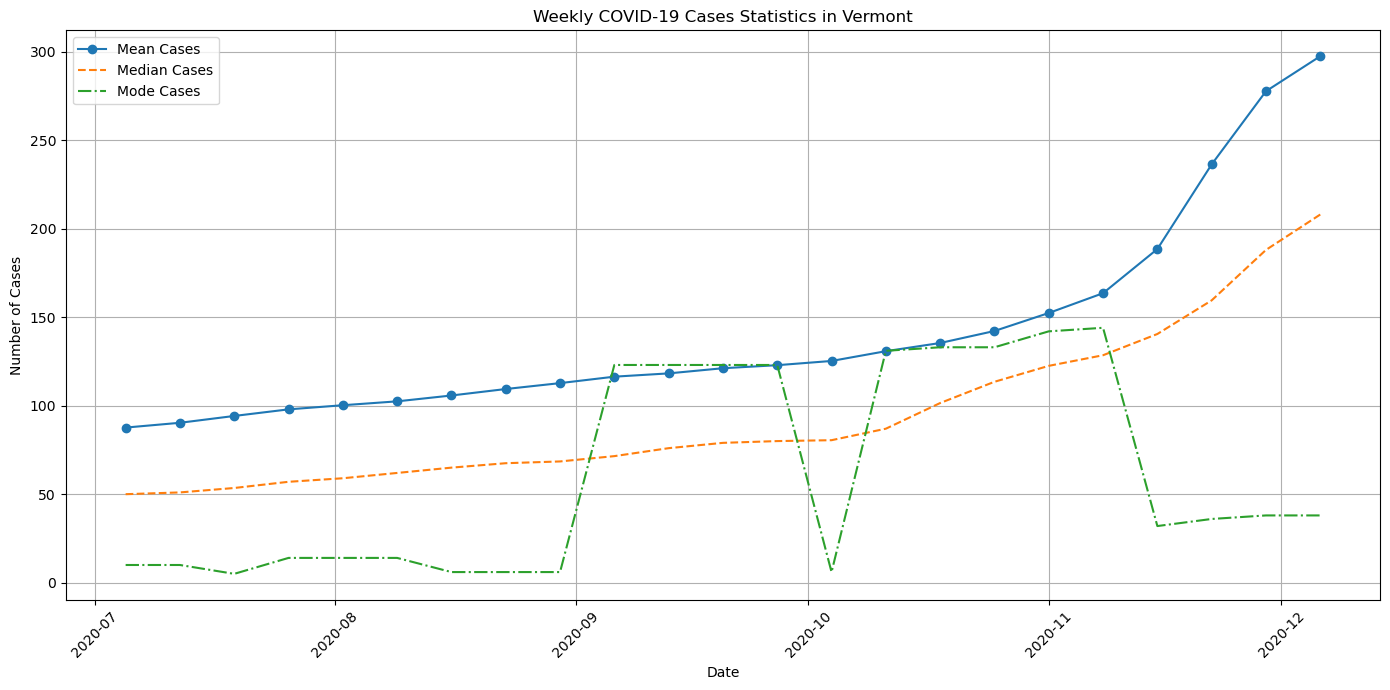

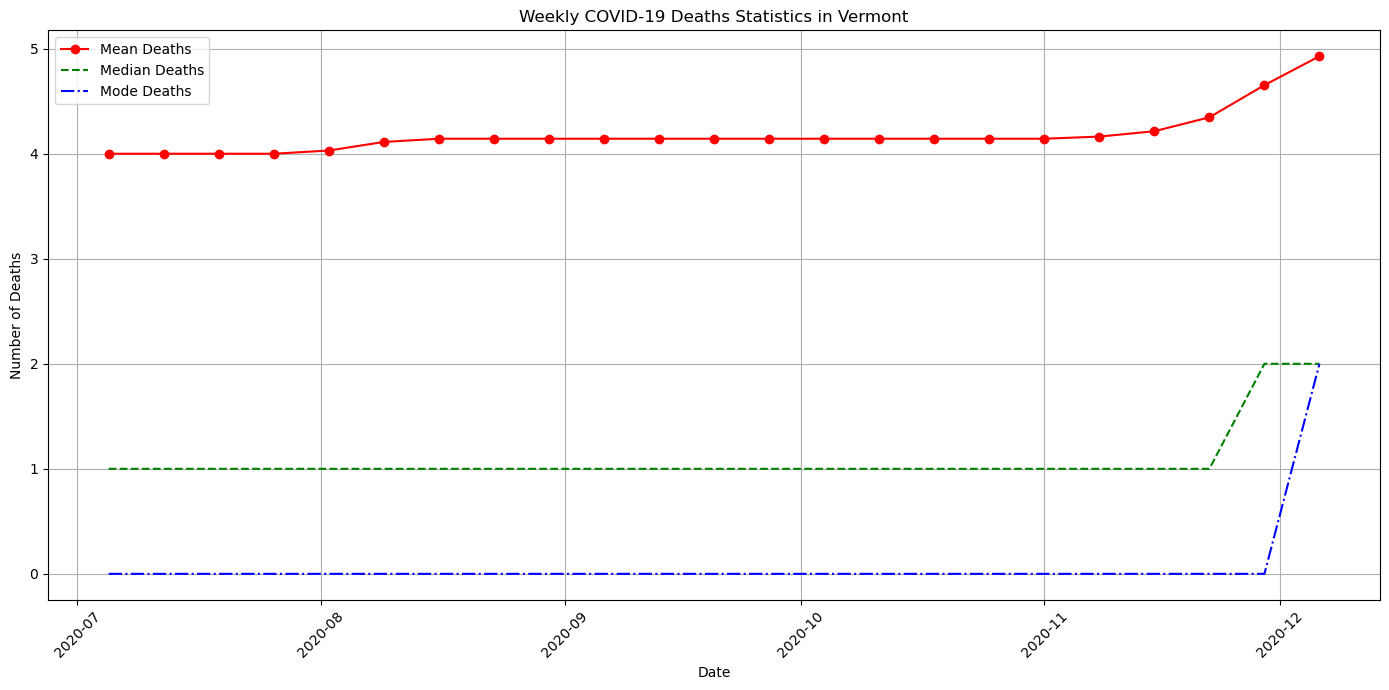

In [84]:
# Plot weekly COVID-19 cases statistics in Vermont
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mean'], label='Mean Cases', marker='o')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['median'], label='Median Cases', linestyle='--')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mode'], label='Mode Cases', linestyle='-.')
plt.title('Weekly COVID-19 Cases Statistics in Vermont')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

# Plot weekly COVID-19 deaths statistics in Vermont
plt.figure(figsize=(14, 7))
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mean'], label='Mean Deaths', marker='o', color='red')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['median'], label='Median Deaths', linestyle='--', color='green')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mode'], label='Mode Deaths', linestyle='-.', color='blue')
plt.title('Weekly COVID-19 Deaths Statistics in Vermont')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

## Question 2

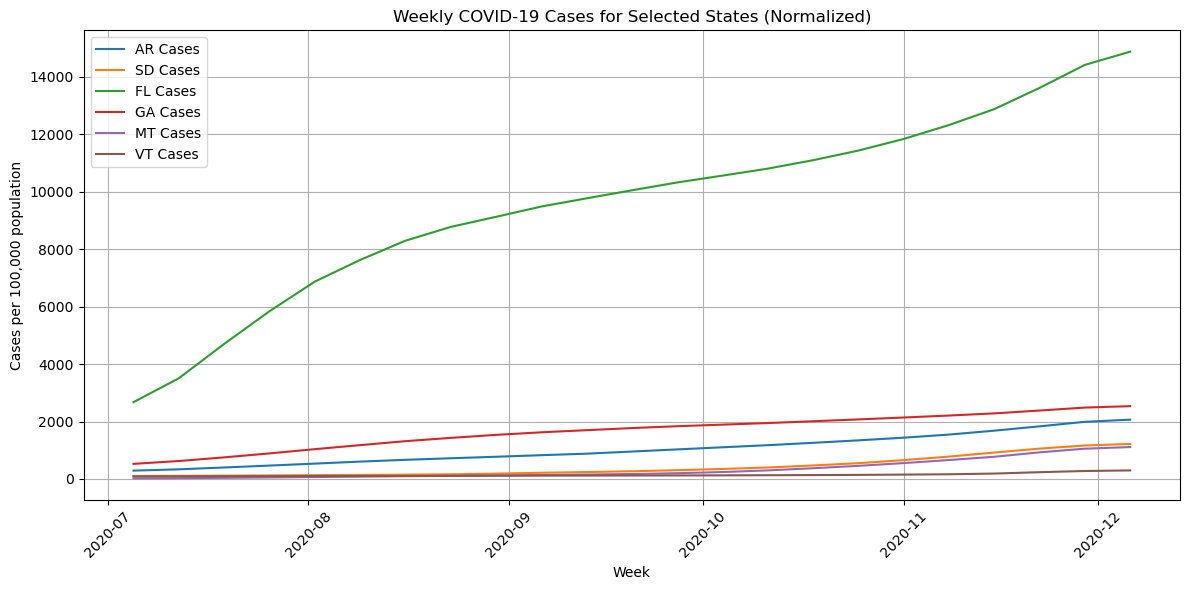

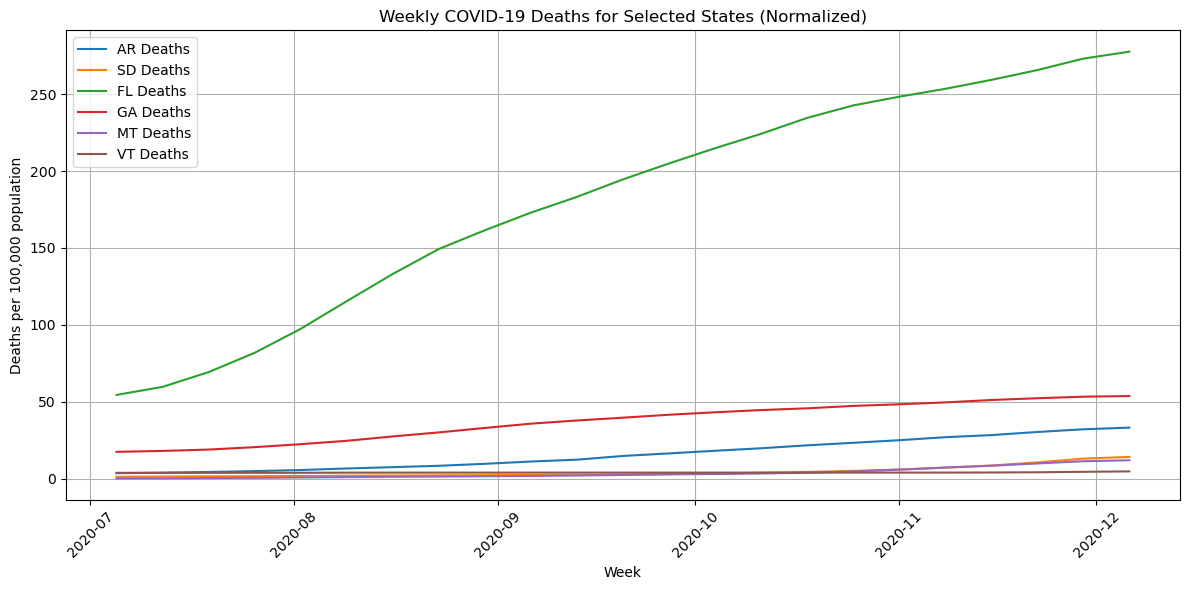

In [85]:
# Adding state populations for the states
state_population = {'Arkansas': 3017825, 'South Dakota': 892717, 'Florida': 21477737, 
                    'Georgia': 10617423, 'Montana': 1068778, 'Vermont': 623989}

# Calculating the population data for Vermont
for state, population in state_population.items():
    vermont_data.loc[vermont_data['State_x'] == state, columns_cases] /= (population / 100000)
    vermont_data.loc[vermont_data['State_x'] == state, columns_deaths] /= (population / 100000)

# Selecting the States initials
selected_states = ['AR', 'SD', 'FL', 'GA', 'MT', 'VT']

# Calculate weekly statistics for each state
weekly_cases_stats = {}
weekly_deaths_stats = {}

for state in selected_states:
    state_data = super_covid[super_covid['State_x'] == state]
    weekly_cases_stats[state] = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats[state] = calculate_weekly_stats(state_data, columns_deaths)

# Plotting the data for the selected states
plt.figure(figsize=(12, 6))

for state in selected_states:
    plt.plot(weekly_cases_stats[state]['mean'], label=f'{state} Cases')

plt.title('Weekly COVID-19 Cases for Selected States (Normalized)')
plt.xlabel('Week')
plt.ylabel('Cases per 100,000 population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Separate graph for deaths
plt.figure(figsize=(12, 6))

for state in selected_states:
    plt.plot(weekly_deaths_stats[state]['mean'], label=f'{state} Deaths')

plt.title('Weekly COVID-19 Deaths for Selected States (Normalized)')
plt.xlabel('Week')
plt.ylabel('Deaths per 100,000 population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Holidays often lead to increased social interactions, with gatherings and events bringing people into close proximity, both indoors and outdoors. Travel associated with holidays further increases the risk and increase the movement of individuals across regions and potentially having the virus spread in new areas.

## Question 3

In [86]:
#Taking only information for Vermont from the super_covid dataset
start_date = '2020-07-06'
end_date = '2020-12-28'

date_columns = super_covid_df.columns[(super_covid_df.columns >= start_date) & (super_covid_df.columns <= end_date)]

columns = ['countyFIPS', 'County Name_x', 'State_x', 'StateFIPS_x', 'County Name_y', 'State_y', 'StateFIPS_y', 'County Name', 'State', 'population'] + date_columns.tolist()

super_covid_df = super_covid_df[columns]

vt_df = super_covid_df[super_covid_df['State_x'] == 'VT']

vt_df.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,County Name_y,State_y,StateFIPS_y,County Name,State,population,...,2020-12-18_y,2020-12-19_y,2020-12-20_y,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y
2806,50001,Addison County,VT,50,Addison County,VT,50,Addison County,VT,36777,...,4,4,4,4,4,4,4,4,4,4
2807,50003,Bennington County,VT,50,Bennington County,VT,50,Bennington County,VT,35470,...,2,2,2,2,2,2,2,2,2,3
2808,50005,Caledonia County,VT,50,Caledonia County,VT,50,Caledonia County,VT,29993,...,2,2,2,2,3,3,3,3,3,3
2809,50007,Chittenden County,VT,50,Chittenden County,VT,50,Chittenden County,VT,163774,...,55,55,57,57,57,59,60,60,61,63
2810,50009,Essex County,VT,50,Essex County,VT,50,Essex County,VT,6163,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#Setting the dates called cases_dates
cases_dates = vt_df.columns[vt_df.columns.str.endswith('_x')]

cases_dates = cases_dates.delete([0, 1, 2])

cases_dates

Index(['2020-07-06_x', '2020-07-07_x', '2020-07-08_x', '2020-07-09_x',
       '2020-07-10_x', '2020-07-11_x', '2020-07-12_x', '2020-07-13_x',
       '2020-07-14_x', '2020-07-15_x',
       ...
       '2020-12-18_x', '2020-12-19_x', '2020-12-20_x', '2020-12-21_x',
       '2020-12-22_x', '2020-12-23_x', '2020-12-24_x', '2020-12-25_x',
       '2020-12-26_x', '2020-12-27_x'],
      dtype='object', length=175)

In [88]:
#Setting the dates called deaths_dates
deaths_dates = vt_df.columns[vt_df.columns.str.endswith('_y')]

deaths_dates = deaths_dates.delete([0, 1, 2])

deaths_dates

Index(['2020-07-06_y', '2020-07-07_y', '2020-07-08_y', '2020-07-09_y',
       '2020-07-10_y', '2020-07-11_y', '2020-07-12_y', '2020-07-13_y',
       '2020-07-14_y', '2020-07-15_y',
       ...
       '2020-12-18_y', '2020-12-19_y', '2020-12-20_y', '2020-12-21_y',
       '2020-12-22_y', '2020-12-23_y', '2020-12-24_y', '2020-12-25_y',
       '2020-12-26_y', '2020-12-27_y'],
      dtype='object', length=175)

In [89]:
#This checks all counties in Vermont to check the top 5 counties 
state_of_choice = 'VT'

state_data = super_covid[super_covid['State_x'] == 'VT'].copy()

start_date = '2020-07-01'
end_date = '2020-12-27'

cases_columns = [col for col in state_data.columns if col >= start_date and col <= end_date and col.endswith('_x')]
deaths_columns = [col for col in state_data.columns if col >= start_date and col <= end_date and col.endswith('_y')]

state_data['total_cases'] = state_data[cases_columns].sum(axis=1)
state_data['total_deaths'] = state_data[deaths_columns].sum(axis=1)

top_counties_cases = state_data.sort_values(by='total_cases', ascending=False).head(5)
top_counties_deaths = state_data.sort_values(by='total_deaths', ascending=False).head(5)

print("Top 5 Counties in", state_of_choice, "by Total Cases (July 2020 - December 2020):")
print(top_counties_cases[['County Name_x', 'total_cases']])
print("\nTop 5 Counties in", state_of_choice, "by Total Deaths (July 2020 - December 2020):")
print(top_counties_deaths[['County Name_y', 'total_deaths']])

Top 5 Counties in VT by Total Cases (July 2020 - December 2020):
           County Name_x  total_cases
2809  Chittenden County        187012
2817  Washington County         40333
2811    Franklin County         30298
2818     Windham County         28361
2816     Rutland County         27316

Top 5 Counties in VT by Total Deaths (July 2020 - December 2020):
           County Name_y  total_deaths
2809  Chittenden County           7298
2811    Franklin County           1443
2818     Windham County            597
2806     Addison County            390
2816     Rutland County            390


In [90]:
#setting the top 5 counties in cases and deaths to "_df"
chittenden_df = vt_df[vt_df['County Name'] == 'Chittenden County']
washington_df = vt_df[vt_df['County Name'] == 'Washington County']
franklin_df = vt_df[vt_df['County Name'] == 'Franklin County']
windham_df = vt_df[vt_df['County Name'] == 'Windham County']
rutland_df = vt_df[vt_df['County Name'] == 'Rutland County']
addison_df = vt_df[vt_df['County Name'] == 'Addison County']

## Question 4

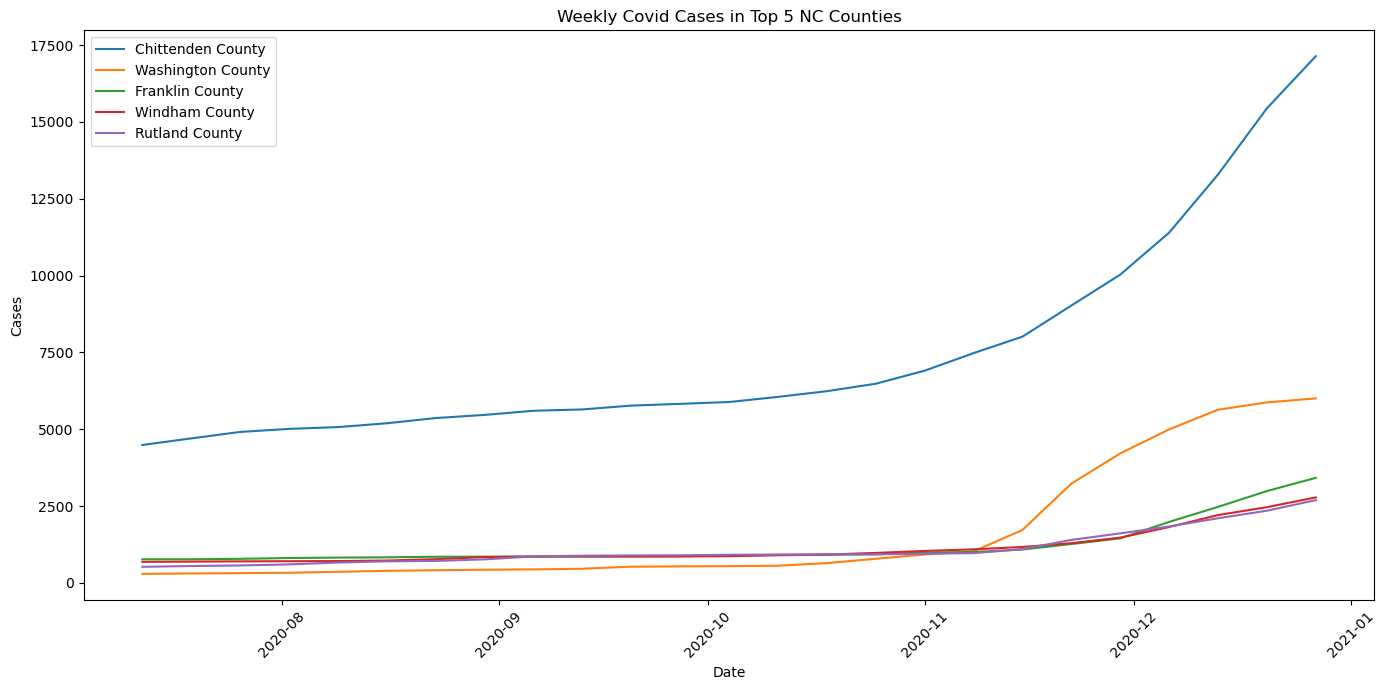

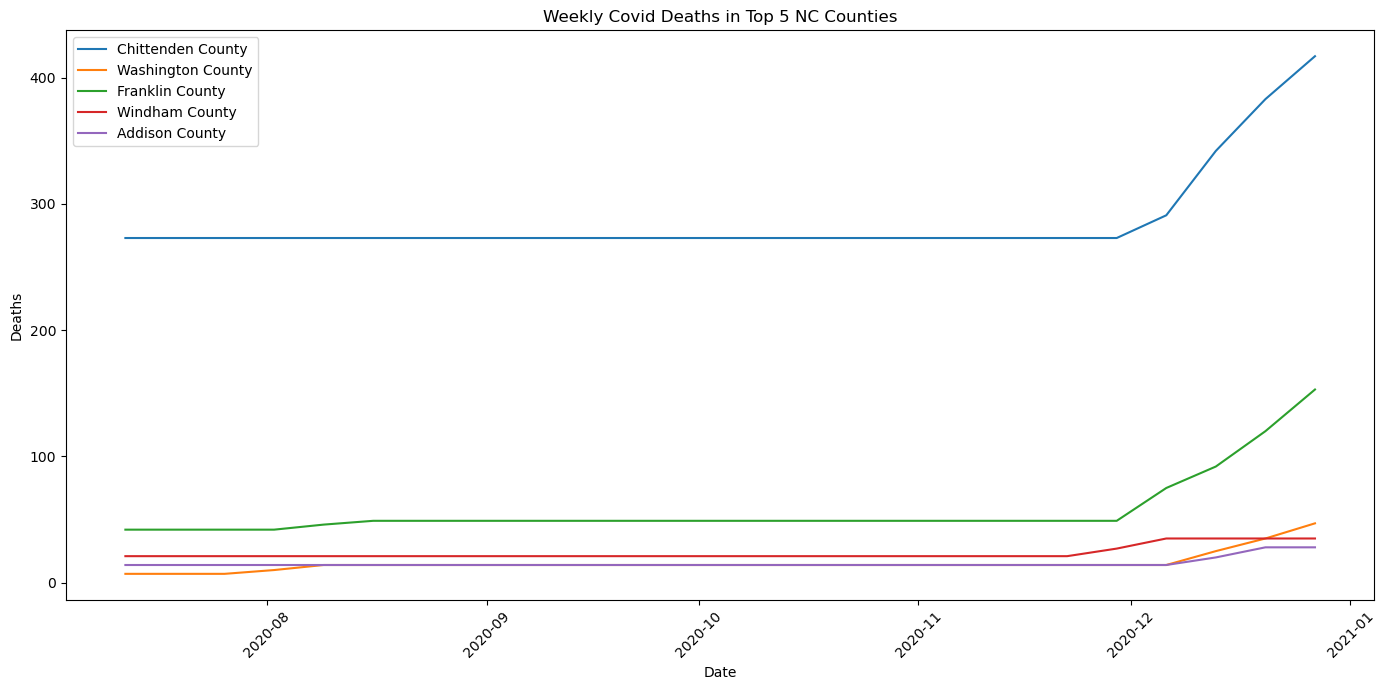

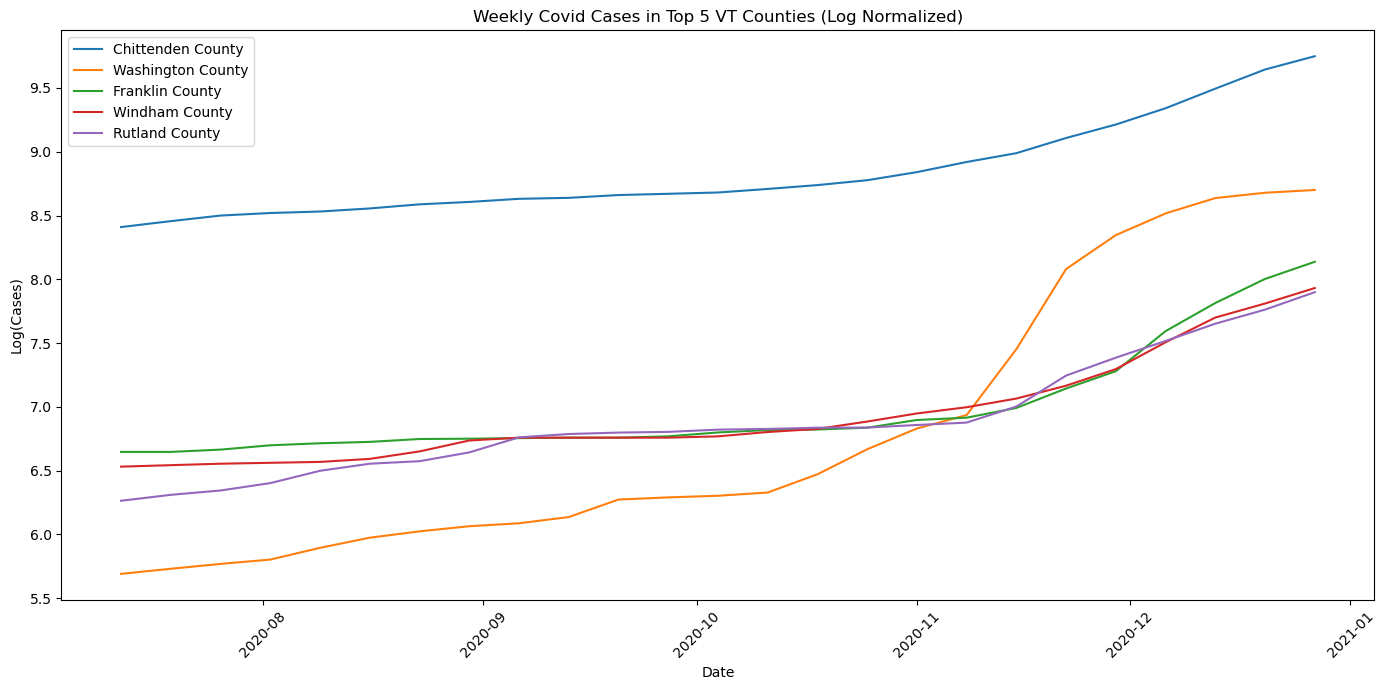

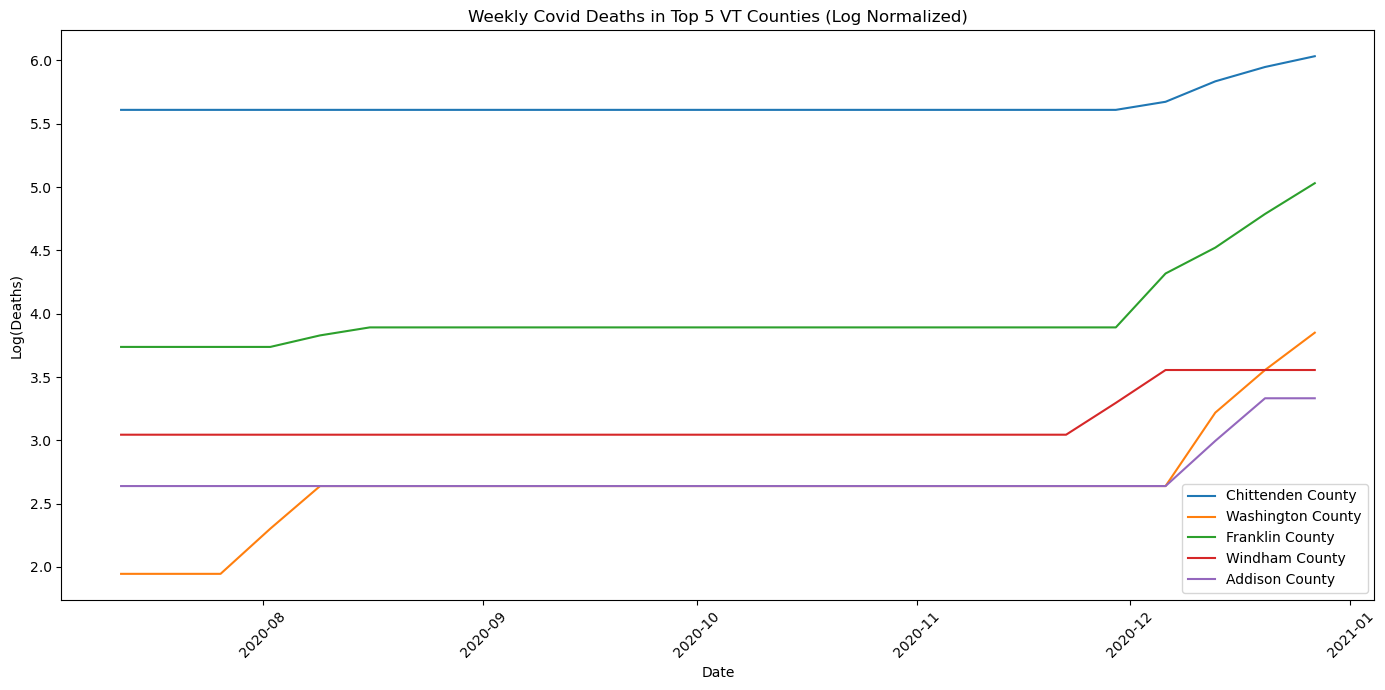

In [91]:
#This creates the plot for raw values and log normalized values
def calculate_weekly_stats_2(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])

    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))

    weekly_stats = weekly_data.sum()

    return weekly_stats

#setting the cases dates and counties to cases for raw values
cases_chitt = calculate_weekly_stats_2(chittenden_df, cases_dates)
cases_wash = calculate_weekly_stats_2(washington_df, cases_dates)
cases_frank = calculate_weekly_stats_2(franklin_df, cases_dates)
cases_wind = calculate_weekly_stats_2(windham_df, cases_dates)
cases_rutl = calculate_weekly_stats_2(rutland_df, cases_dates)
deaths_addi = calculate_weekly_stats_2(addison_df, deaths_dates)

#setting the plot size
plt.figure(figsize=(14, 7))


plt.plot(cases_chitt.index, cases_chitt['count'], label="Chittenden County")
plt.plot(cases_wash.index, cases_wash['count'], label="Washington County")
plt.plot(cases_frank.index, cases_frank['count'], label="Franklin County")
plt.plot(cases_wind.index, cases_wind['count'], label="Windham County")
plt.plot(cases_rutl.index, cases_rutl['count'], label="Rutland County")

plt.title("Weekly Covid Cases in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#setting the deaths dates and counties to deaths for raw values
deaths_chitt = calculate_weekly_stats_2(chittenden_df, deaths_dates)
deaths_wash = calculate_weekly_stats_2(washington_df, deaths_dates)
deaths_frank = calculate_weekly_stats_2(franklin_df, deaths_dates)
deaths_wind = calculate_weekly_stats_2(windham_df, deaths_dates)
deaths_rutl = calculate_weekly_stats_2(rutland_df, deaths_dates)

#setting the plot size
plt.figure(figsize=(14, 7))

plt.plot(deaths_chitt.index, deaths_chitt['count'], label="Chittenden County")
plt.plot(deaths_wash.index, deaths_wash['count'], label="Washington County")
plt.plot(deaths_frank.index, deaths_frank['count'], label="Franklin County")
plt.plot(deaths_wind.index, deaths_wind['count'], label="Windham County")
plt.plot(deaths_addi.index, deaths_addi['count'], label="Addison County")

plt.title("Weekly Covid Deaths in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#setting the plot size
plt.figure(figsize=(14, 7))

#setting the cases dates and counties to cases for log normalized values
plt.plot(cases_chitt.index, np.log(cases_chitt['count']), label="Chittenden County")
plt.plot(cases_wash.index, np.log(cases_wash['count']), label="Washington County")
plt.plot(cases_frank.index, np.log(cases_frank['count']), label="Franklin County")
plt.plot(cases_wind.index, np.log(cases_wind['count']), label="Windham County")
plt.plot(cases_rutl.index, np.log(cases_rutl['count']), label="Rutland County")

plt.title("Weekly Covid Cases in Top 5 VT Counties (Log Normalized)")
plt.xlabel("Date")
plt.ylabel("Log(Cases)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#setting the plot size
plt.figure(figsize=(14, 7))

#setting the deaths dates and counties to deaths for log normalized values
plt.plot(deaths_chitt.index, np.log(deaths_chitt['count']), label="Chittenden County")
plt.plot(deaths_wash.index, np.log(deaths_wash['count']), label="Washington County")
plt.plot(deaths_frank.index, np.log(deaths_frank['count']), label="Franklin County")
plt.plot(deaths_wind.index, np.log(deaths_wind['count']), label="Windham County")
plt.plot(deaths_addi.index, np.log(deaths_addi['count']), label="Addison County")

plt.title("Weekly Covid Deaths in Top 5 VT Counties (Log Normalized)")
plt.xlabel("Date")
plt.ylabel("Log(Deaths)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Holidays often lead to increased social interactions, with gatherings and events bringing people into close proximity, both indoors and outdoors. Travel associated with holidays further increases the risk and increase the movement of individuals across regions and potentially having the virus spread in new areas.
The peaks were during the December time.